# Uniform Linear Array (ULA) beam pattern

* This code generates the beam pattern of a uniform linear array (ULA) for different numbers of antennas ( M ), showing how the array size impacts the beamforming gain and directivity. The results are plotted in both linear and decibel (dB) scales for visualization.

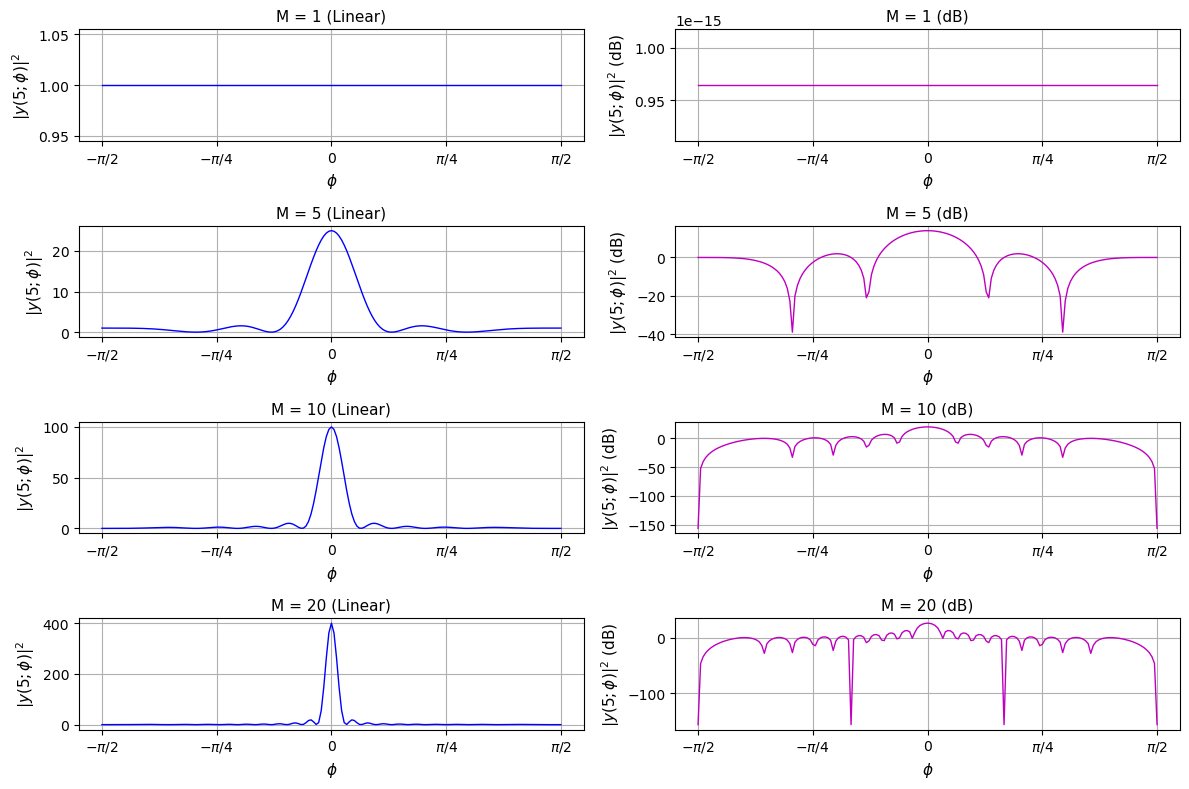

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fc = 2.42 * 10**9  # Carrier frequency in Hz
m1 = 1  # m(1)
b1 = m1 * np.exp(1j * 2 * np.pi * fc * 5)  # Carrier frequency modulated signal b(1)

Maxis = [1, 5, 10, 20]  # Array sizes
pstep = np.pi / 180  # AoA scanning step
paxis = np.arange(-np.pi / 2, np.pi / 2 + pstep, pstep)  # AoA axis
sqmag_y1 = np.zeros((len(Maxis), len(paxis)))  # Initialize power beam pattern

# Create subplots
fig, axes = plt.subplots(len(Maxis), 2, figsize=(12, 8))  # 2 columns for linear and dB scale

for mind, M in enumerate(Maxis):
    w = np.ones(M)  # Beamformer weights
    
    for pind, phi in enumerate(paxis):
        # Array response vector
        a = np.exp(1j * np.pi * np.sin(phi) * np.arange(M))
        
        # SOI vector
        x1 = b1 * a
        
        # Beamformer output
        y1 = np.dot(w.conj(), x1)
        
        # Magnitude of beamformer output
        sqmag_y1[mind, pind] = np.abs(y1)**2
    
    # Linear scale plot
    ax_linear = axes[mind, 0]
    ax_linear.plot(paxis, sqmag_y1[mind, :], 'b', linewidth=1)
    ax_linear.set_ylabel(r'$|y(5; \phi)|^2$', fontsize=11)
    ax_linear.set_xlabel(r'$\phi$', fontsize=11)
    ax_linear.set_title(f'M = {M} (Linear)', fontsize=11)
    ax_linear.grid(True)
    ax_linear.set_xticks([-np.pi / 2, -np.pi / 4, 0, np.pi / 4, np.pi / 2])
    ax_linear.set_xticklabels([r'$-\pi/2$', r'$-\pi/4$', '0', r'$\pi/4$', r'$\pi/2$'])

    # dB scale plot
    ax_db = axes[mind, 1]
    ax_db.plot(paxis, 10 * np.log10(sqmag_y1[mind, :] + np.finfo(float).eps), 'm', linewidth=1)
    ax_db.set_ylabel(r'$|y(5; \phi)|^2$ (dB)', fontsize=11)
    ax_db.set_xlabel(r'$\phi$', fontsize=11)
    ax_db.set_title(f'M = {M} (dB)', fontsize=11)
    ax_db.grid(True)
    ax_db.set_xticks([-np.pi / 2, -np.pi / 4, 0, np.pi / 4, np.pi / 2])
    ax_db.set_xticklabels([r'$-\pi/2$', r'$-\pi/4$', '0', r'$\pi/4$', r'$\pi/2$'])

# Adjust layout
plt.tight_layout()
plt.show()

# Key Observations
1.	Impact of Array Size ( M ):
	•	As  M  increases, the beam becomes more directive (narrower main lobe) and has higher gain.
	•	Smaller arrays ( M = 1 ) have wide lobes with no significant directivity.
2.	Beamforming Gain:
	•	The maximum power increases with  M , improving the ability to focus energy in the desired direction.
3.	Linear vs. dB Scale:
	•	The linear scale shows absolute power.
	•	The dB scale highlights relative differences, making side lobes and dynamic range more visible.